# Análise de Dados

## Importando as bibliotecas e os dados

In [14]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import warnings
import locale
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

Consulta no banco de dados todas as notas Fiscais lançadas

In [3]:
%%sql
SELECT 
    data, 
    numeroNotaFiscal, 
    destino, 
    procedencia, 
    cad_cidades.estado as estado,
    produto, 
    unidade, 
    unidade_peso, 
    quantidade, 
    volume,
    cad_usuarios.tipo,
    nome_usuario_sistema
FROM 
    divtec_notasfiscais
LEFT JOIN
    cad_usuarios
        ON cad_usuarios.matricula_nome = divtec_notasfiscais.destino
LEFT JOIN
    cad_cidades ON divtec_notasfiscais.procedencia = cad_cidades.cidade
WHERE EXTRACT(YEAR FROM data) = 2024

,data,numeroNotaFiscal,destino,procedencia,estado,produto,unidade,unidade_peso,quantidade,volume,tipo,nome_usuario_sistema
0,2024-07-22,66122,5500971-CHS COMERCIO DE FRUTAS E,0152098-GOIANIA (GO),GOIAS,07404-TOMATE CAQUI LONGA VIDA,KG,1.000,13860.000,13860.000,ATACADISTA,Andressa
1,2024-07-22,317104,5500893-TROPICAL COMERCIO DE PRO,0143420-TRES FORQUILHAS (RS),RIO GRANDE DO SUL,08102-CENOURA,CX,20.000,210.000,4200.000,ATACADISTA,Mateus
2,2024-07-22,317104,5500893-TROPICAL COMERCIO DE PRO,0143420-TRES FORQUILHAS (RS),RIO GRANDE DO SUL,07802-BETERRABA,CX,20.000,70.000,1400.000,ATACADISTA,Mateus
3,2024-07-22,210965,5500893-TROPICAL COMERCIO DE PRO,0143370-MARIANA PIMENTEL (RS),RIO GRANDE DO SUL,10101-BATATA-DOCE,CX,20.000,150.000,3000.000,ATACADISTA,Mateus
4,2024-07-22,931754,5501039-GEAZI NEVES DA SILVA,0143370-MARIANA PIMENTEL (RS),RIO GRANDE DO SUL,10101-BATATA-DOCE,KG,1.000,8000.000,8000.000,ATACADISTA,Mateus
...,...,...,...,...,...,...,...,...,...,...,...,...
75435,2024-09-24,637346,0116565-PAULO GABRIEL GONCALVES BASSANI,0143368-MAQUINE (RS),RIO GRANDE DO SUL,05601-REPOLHO VERDE,DZ,30.857,40.000,1234.280,PRODUTOR,Jessica
75436,2024-09-24,637346,0116565-PAULO GABRIEL GONCALVES BASSANI,0143368-MAQUINE (RS),RIO GRANDE DO SUL,04702-BROCOLIS,DZ,6.000,50.000,300.000,PRODUTOR,Jessica
75437,2024-09-24,637346,0116565-PAULO GABRIEL GONCALVES BASSANI,0143368-MAQUINE (RS),RIO GRANDE DO SUL,04501-ALFACE,DZ,4.200,50.000,210.000,PRODUTOR,Jessica
75438,2024-09-24,637346,0116565-PAULO GABRIEL GONCALVES BASSANI,0143368-MAQUINE (RS),RIO GRANDE DO SUL,05001-COUVE,DZ,4.800,50.000,240.000,PRODUTOR,Jessica


In [4]:
dados_2024 = dados.copy(deep=True)
dados_2024['data'] = dados_2024['data'].astype('datetime64[ns]')
dados_2024['dia da semana'] = dados_2024['data'].dt.day_name()

In [5]:
dados_2024 = dados_2024.loc[(dados_2024['dia da semana'] == 'Monday') & (dados_2024['tipo'] == 'PRODUTOR')]

In [6]:
dados_2024.head()

,data,numeroNotaFiscal,destino,procedencia,estado,produto,unidade,unidade_peso,quantidade,volume,tipo,nome_usuario_sistema,dia da semana
150,2024-07-22,595,0101132-LUIZ ARTUR EBERHARDT JAC,0143481-ITATI (RS),RIO GRANDE DO SUL,06003-ABOBRINHA ITALIANA,CX,15.000,3.000,45.000,PRODUTOR,Andressa,Monday
151,2024-07-22,595,0101132-LUIZ ARTUR EBERHARDT JAC,0143481-ITATI (RS),RIO GRANDE DO SUL,07802-BETERRABA,CX,20.000,30.000,600.000,PRODUTOR,Andressa,Monday
152,2024-07-22,595,0101132-LUIZ ARTUR EBERHARDT JAC,0143481-ITATI (RS),RIO GRANDE DO SUL,04702-BROCOLIS,DZ,6.000,40.000,240.000,PRODUTOR,Andressa,Monday
153,2024-07-22,595,0101132-LUIZ ARTUR EBERHARDT JAC,0143481-ITATI (RS),RIO GRANDE DO SUL,08102-CENOURA,CX,20.000,50.000,1000.000,PRODUTOR,Andressa,Monday
154,2024-07-22,595,0101132-LUIZ ARTUR EBERHARDT JAC,0143481-ITATI (RS),RIO GRANDE DO SUL,10601-COUVE-FLOR,DZ,24.000,20.000,480.000,PRODUTOR,Andressa,Monday


In [7]:
dados_2024 = dados_2024.groupby(['data','produto'])['volume'].sum().reset_index()

In [8]:
dados_2024

,data,produto,volume
0,2024-02-05,00101-ABACATE,1708.000
1,2024-02-05,00301-AMEIXA NACIONAL,8824.000
2,2024-02-05,00501-BANANA CATURRA / NANICA,27844.000
3,2024-02-05,00503-BANANA PRATA / BRANCA,38730.000
4,2024-02-05,00602-CAQUI CHOCOLATE,250.000
...,...,...,...
736,2024-09-23,09401-MILHO RACAO,2500.000
737,2024-09-23,10101-BATATA-DOCE,18500.000
738,2024-09-23,10501-COUVE CHINESA,945.000
739,2024-09-23,10601-COUVE-FLOR,16974.000


Ajustando a coluna de data e criando uma cópia dos dados para não precisar refazer a pesquisa no banco de dados

### Dados Anos Anteriores

In [2]:
%%sql
SELECT
    pesquisa.data,
    pesquisa.produto,
    pesquisa.destino,
    pesquisa.unidade,
    pesquisa.quantidade,
    pesos_produtos.peso_equivalente_kg AS peso,
    (pesos_produtos.peso_equivalente_kg::numeric(10,2) * pesquisa.quantidade::numeric(10,2)) AS volume
FROM (
    SELECT
        data,
        produto,
        destino,
        unidade,
        round(sum(quantidade),2) quantidade
    FROM
        divtec.lancamentos
    WHERE data >='2021-01-01' and data < '2024-01-01'
    GROUP BY data, destino, produto, unidade
    ORDER BY data, produto, unidade
         ) AS pesquisa
    LEFT JOIN divtec.pesos_produtos
        ON pesquisa.produto = pesos_produtos.produtos AND
            pesquisa.unidade = pesos_produtos.tipo

,data,produto,destino,unidade,quantidade,peso,volume
0,2021-01-04,00101-ABACATE,5500078-TRANSANTA TRANSP.E COM.D,0,2880,1.000,2880.000
1,2021-01-04,00101-ABACATE,5500358-COM.DE LARANJAS VALE DO,0,640,1.000,640.000
2,2021-01-04,00101-ABACATE,5500531-IRMAOS NEDEL LTDA-ME,0,864,1.000,864.000
3,2021-01-04,00101-ABACATE,5500787-UNIFRUTAS- COMERCIO DE,0,1440,1.000,1440.000
4,2021-01-04,00101-ABACATE,5501008-COMERCIO DE FRUTAS METZ,0,1476,1.000,1476.000
...,...,...,...,...,...,...,...
1017836,2023-11-30,52901-TULIPA,5500841-CONCEICAO DA ROSA MOLLER,4,22,0.300,6.600
1017837,2023-11-30,53501-KALANDIVA VASO,5500841-CONCEICAO DA ROSA MOLLER,4,24,0.300,7.200
1017838,2023-11-30,54601-ROSA VERMELHA 20UN,5501050-BONET& FREITAS COM. VAR,5,233,0.340,79.220
1017839,2023-11-30,54601-ROSA VERMELHA 20UN,5501064-DENILSON GONCALVES DOS S,5,57,0.340,19.380


In [62]:
dados_anos_anteriores.loc[dados_anos_anteriores['volume'].isnull()]

,data,produto,destino,unidade,quantidade,peso,volume


In [63]:
dados_anos_anteriores = dados_anos_anteriores.drop_duplicates()

In [64]:
df_anos_anteriores = dados_anos_anteriores.copy(deep=True)
df_anos_anteriores['data'] = df_anos_anteriores['data'].astype('datetime64[ns]')
df_anos_anteriores['dia da semana'] = df_anos_anteriores['data'].dt.day_name()
df_anos_anteriores = df_anos_anteriores.loc[df_anos_anteriores['dia da semana'] == 'Monday']

In [65]:
lista = df_anos_anteriores['destino'].unique()
produtores = []
for item in lista:
	if item.startswith('01') or item.startswith('71'):
		produtores.append(item)
produtores.sort()

In [66]:
df_anos_anteriores = df_anos_anteriores.loc[df_anos_anteriores['destino'].isin(produtores)]
df_anos_anteriores = df_anos_anteriores[['data','produto','volume']]
df_anos_anteriores = df_anos_anteriores.groupby(['data','produto'])['volume'].sum().reset_index()

In [67]:
df_anos_anteriores.head()

,data,produto,volume
0,2021-01-04,00301-AMEIXA NACIONAL,4800.000
1,2021-01-04,00401-AMORA PRETA,12.600
2,2021-01-04,00501-BANANA CATURRA / NANICA,15400.000
3,2021-01-04,00503-BANANA PRATA / BRANCA,10960.000
4,2021-01-04,00901-FIGO MADURO,190.000


### Merge DataFrame

In [ ]:
dados_2024.columns

In [ ]:
df_anos_anteriores.columns

In [17]:
df_volume = pd.concat([dados_2024,df_anos_anteriores])

In [18]:
df_volume['ano'] = df_volume['data'].dt.year
df_volume['mes'] = df_volume['data'].dt.month

In [19]:
df_volume.head()

,data,produto,volume,ano,mes
0,2024-02-05,00101-ABACATE,1708.000,2024,2
1,2024-02-05,00301-AMEIXA NACIONAL,8824.000,2024,2
2,2024-02-05,00501-BANANA CATURRA / NANICA,27844.000,2024,2
3,2024-02-05,00503-BANANA PRATA / BRANCA,38730.000,2024,2
4,2024-02-05,00602-CAQUI CHOCOLATE,250.000,2024,2


### Dados Cotação

In [20]:
%%sql
CALL CotacaoEmQuilogramasPorPeriodo('2021-01-01','2024-09-23')

,data,produto,unidade,mais_frequente,peso em KG,Preço por Kg
0,2021-07-01,00101-ABACATE,KG,3.750,1.000,3.750
1,2021-07-01,00101-ABACATE,KG,3.750,1.000,3.750
2,2021-07-01,00201-ABACAXI CAIENA (HAWAI),UND,4.000,1.800,2.220
3,2021-07-01,00201-ABACAXI CAIENA (HAWAI),UND,4.000,1.800,2.220
4,2021-07-01,00202-ABACAXI PEROLA,UND,3.500,1.300,2.690
...,...,...,...,...,...,...
104795,2024-09-23,54950-ROSA IMPORTADA,MOL,0.000,0.600,0.000
104796,2024-09-23,FOLHAGENS VARIADAS,UND,20.000,2.000,10.000
104797,2024-09-23,MANGOSTAO,KG,50.000,1.000,50.000
104798,2024-09-23,TAMARA,KG,30.000,1.000,30.000


In [21]:
x = df_cotacao.loc[df_cotacao['Preço por Kg'].isnull()]
x

,data,produto,unidade,mais_frequente,peso em KG,Preço por Kg


### Separando as cotações mensais

In [22]:
df_cotacao['data'] = df_cotacao['data'].astype('datetime64[ns]')
df_cotacao.rename(columns={'Preço por Kg':'preco'},inplace=True)

#### Janeiro 2024

In [23]:
cotacao_jan_2024 = df_cotacao.copy(deep=True)
cotacao_jan_2024 = cotacao_jan_2024.loc[(cotacao_jan_2024['data'].dt.year == 2024) & (cotacao_jan_2024['data'].dt.month == 1)]
cotacao_jan_2024 = cotacao_jan_2024.groupby('produto')['preco'].mean().reset_index()
cotacao_jan_2024['ano'] = 2024
cotacao_jan_2024['mes'] = 1

In [24]:
cotacao_jan_2024

,produto,preco,ano,mes
0,00101-ABACATE,5.165,2024,1
1,00201-ABACAXI CAIENA (HAWAI),4.860,2024,1
2,00202-ABACAXI PEROLA,5.861,2024,1
3,00203-ABACAXI TERRA DE AREIA,11.250,2024,1
4,00301-AMEIXA NACIONAL,7.938,2024,1
...,...,...,...,...
207,54601-ROSA VERMELHA 20UN,74.648,2024,1
208,54701-MOSQUITINHO,114.168,2024,1
209,54801-VERDES (SAMAMBAIA PRETA),30.000,2024,1
210,54901-ROSA COLORIDA 20UN,70.418,2024,1


#### Agosto 2021-2024

In [25]:
cotacao_agosto_2021 = df_cotacao.copy(deep=True)
cotacao_agosto_2021 = cotacao_agosto_2021.loc[(cotacao_agosto_2021['data'].dt.year == 2021) & (cotacao_agosto_2021['data'].dt.month == 8)]
cotacao_agosto_2021 = cotacao_agosto_2021.groupby('produto')['preco'].mean().reset_index()
cotacao_agosto_2021['ano'] = 2021
cotacao_agosto_2021['mes'] = 8

cotacao_agosto_2022 = df_cotacao.copy(deep=True)
cotacao_agosto_2022 = cotacao_agosto_2022.loc[(cotacao_agosto_2022['data'].dt.year == 2022) & (cotacao_agosto_2022['data'].dt.month == 8)]
cotacao_agosto_2022 = cotacao_agosto_2022.groupby('produto')['preco'].mean().reset_index()
cotacao_agosto_2022['ano'] = 2022
cotacao_agosto_2022['mes'] = 8

cotacao_agosto_2023 = df_cotacao.copy(deep=True)
cotacao_agosto_2023 = cotacao_agosto_2023.loc[(cotacao_agosto_2023['data'].dt.year == 2023) & (cotacao_agosto_2023['data'].dt.month == 8)]
cotacao_agosto_2023 = cotacao_agosto_2023.groupby('produto')['preco'].mean().reset_index()
cotacao_agosto_2023['ano'] = 2023
cotacao_agosto_2023['mes'] = 8

cotacao_agosto_2024 = df_cotacao.copy(deep=True)
cotacao_agosto_2024 = cotacao_agosto_2024.loc[(cotacao_agosto_2024['data'].dt.year == 2024) & (cotacao_agosto_2024['data'].dt.month == 8)]
cotacao_agosto_2024 = cotacao_agosto_2024.groupby('produto')['preco'].mean().reset_index()
cotacao_agosto_2024['ano'] = 2024
cotacao_agosto_2024['mes'] = 8

cotacao_agosto = pd.concat([cotacao_agosto_2021,cotacao_agosto_2022,cotacao_agosto_2023,cotacao_agosto_2024])

In [26]:
cotacao_agosto

,produto,preco,ano,mes
0,00101-ABACATE,4.788,2021,8
1,00201-ABACAXI CAIENA (HAWAI),2.064,2021,8
2,00202-ABACAXI PEROLA,2.352,2021,8
3,00203-ABACAXI TERRA DE AREIA,6.623,2021,8
4,00350-AMEIXA IMPORTADA,10.076,2021,8
...,...,...,...,...
216,54901-ROSA COLORIDA 20UN,134.850,2024,8
217,54950-ROSA IMPORTADA,154.165,2024,8
218,FOLHAGENS VARIADAS,10.000,2024,8
219,MANGOSTAO,20.455,2024,8


#### Setembro 2021-2024

In [27]:
cotacao_setembro_2021 = df_cotacao.copy(deep=True)
cotacao_setembro_2021 = cotacao_setembro_2021.loc[(cotacao_setembro_2021['data'].dt.year == 2021) & (cotacao_setembro_2021['data'].dt.month == 9)]
cotacao_setembro_2021 = cotacao_setembro_2021.groupby('produto')['preco'].mean().reset_index()
cotacao_setembro_2021['ano'] = 2021
cotacao_setembro_2021['mes'] = 9

cotacao_setembro_2022 = df_cotacao.copy(deep=True)
cotacao_setembro_2022 = cotacao_setembro_2022.loc[(cotacao_setembro_2022['data'].dt.year == 2022) & (cotacao_setembro_2022['data'].dt.month == 9)]
cotacao_setembro_2022 = cotacao_setembro_2022.groupby('produto')['preco'].mean().reset_index()
cotacao_setembro_2022['ano'] = 2022
cotacao_setembro_2022['mes'] = 9

cotacao_setembro_2023 = df_cotacao.copy(deep=True)
cotacao_setembro_2023 = cotacao_setembro_2023.loc[(cotacao_setembro_2023['data'].dt.year == 2023) & (cotacao_setembro_2023['data'].dt.month == 9)]
cotacao_setembro_2023 = cotacao_setembro_2023.groupby('produto')['preco'].mean().reset_index()
cotacao_setembro_2023['ano'] = 2023
cotacao_setembro_2023['mes'] = 9

cotacao_setembro_2024 = df_cotacao.copy(deep=True)
cotacao_setembro_2024 = cotacao_setembro_2024.loc[(cotacao_setembro_2024['data'].dt.year == 2024) & (cotacao_setembro_2024['data'].dt.month == 9)]
cotacao_setembro_2024 = cotacao_setembro_2024.groupby('produto')['preco'].mean().reset_index()
cotacao_setembro_2024['ano'] = 2024
cotacao_setembro_2024['mes'] = 9

cotacao_setembro = pd.concat([cotacao_setembro_2021,cotacao_setembro_2022,cotacao_setembro_2023,cotacao_setembro_2024])

In [28]:
cotacao_setembro

,produto,preco,ano,mes
0,00101-ABACATE,7.202,2021,9
1,00201-ABACAXI CAIENA (HAWAI),1.940,2021,9
2,00202-ABACAXI PEROLA,2.538,2021,9
3,00203-ABACAXI TERRA DE AREIA,5.500,2021,9
4,00350-AMEIXA IMPORTADA,11.832,2021,9
...,...,...,...,...
218,54950-ROSA IMPORTADA,0.000,2024,9
219,FOLHAGENS VARIADAS,10.000,2024,9
220,MANGOSTAO,50.000,2024,9
221,TAMARA,30.000,2024,9


## Volume e Valor das Segundas Feiras 2021 até 2024

### Janeiro 2024

In [29]:
dados_jan_2024 = pd.read_excel(r"G:\Meu Drive\Notas Fiscais\2024\01\Janeiro 2024.xlsx")

In [30]:
dados_jan_2024 = dados_jan_2024.groupby(['data','produto'])['volume'].sum().reset_index()
dados_jan_2024['data'] = dados_jan_2024['data'].astype('datetime64[ns]')
dados_jan_2024['dia da semana'] = dados_jan_2024['data'].dt.day_name()
dados_jan_2024 = dados_jan_2024.loc[dados_jan_2024['dia da semana'] == 'Monday']

dados_jan_2024['ano'] = dados_jan_2024['data'].dt.year
dados_jan_2024['mes'] = dados_jan_2024['data'].dt.month

In [31]:
dados_jan_2024 = dados_jan_2024.merge(cotacao_jan_2024, on=['ano','mes','produto'], how='left')
dados_jan_2024['valor'] = dados_jan_2024['preco'] * dados_jan_2024['volume']

In [32]:
dados_jan_2024.loc[dados_jan_2024['preco'].isnull()]

,data,produto,volume,dia da semana,ano,mes,preco,valor


In [33]:
dados_jan_2024 = dados_jan_2024.groupby(['data'])[['volume','valor']].sum().reset_index()
dados_jan_2024.to_excel('Dados Janeiro 2024.xlsx', index=False)

### Agosto 2021-2024

In [68]:
df_agosto = df_volume.copy(deep=True)
df_agosto = df_agosto.loc[(df_agosto['mes'] == 8)]
df_agosto = df_agosto[['data','ano','mes','produto','volume']]
df_agosto = df_agosto.groupby(['data','ano','mes','produto'])['volume'].sum().reset_index()

In [69]:
df_agosto = df_agosto.merge(cotacao_agosto, on=['ano','mes','produto'], how='left')
df_agosto['valor'] = df_agosto['preco'] * df_agosto['volume']

In [70]:
df_agosto = df_agosto.groupby(['data'])[['volume','valor']].sum().reset_index()
df_agosto

,data,volume,valor
0,2021-08-02,1408760.200,3435951.537
1,2021-08-09,1834831.080,4907157.899
2,2021-08-16,1329770.780,3088103.056
3,2021-08-23,1418466.100,3390479.756
4,2021-08-30,1373990.320,3357538.579
5,2022-08-01,1231845.080,4374598.727
6,2022-08-08,1187102.860,4242358.229
7,2022-08-15,1183474.280,4060868.880
8,2022-08-22,1899882.850,6785095.150
9,2022-08-29,1119741.860,4025532.316


In [71]:
df_agosto.to_excel('Agosto.xlsx')

### Setembro 2021-2024

In [60]:
df_setembro = df_volume.copy(deep=True)

In [40]:
df_setembro = df_volume.copy(deep=True)
df_setembro = df_setembro.loc[(df_setembro['mes'] == 9)]
df_setembro = df_setembro[['data','ano','mes','produto','volume']]
df_setembro = df_setembro.groupby(['data','ano','mes','produto'])['volume'].sum().reset_index()

In [41]:
df_setembro = df_setembro.merge(cotacao_setembro, on=['ano', 'mes', 'produto'], how='left')
df_setembro['valor'] = df_setembro['preco'] * df_setembro['volume']

In [42]:
df_setembro = df_setembro.groupby(['data'])['volume'].sum().reset_index()
df_setembro

,data,volume
0,2021-09-06,2418055.120
1,2021-09-13,1537786.400
2,2021-09-27,1471105.520
3,2022-09-05,1210279.060
4,2022-09-12,1212018.540
5,2022-09-19,1211927.960
6,2022-09-26,1119660.000
7,2023-09-04,588531.200
8,2023-09-11,561350.030
9,2023-09-18,537600.270


In [43]:
df_setembro.to_excel('Setembro.xlsx')

In [ ]:
df_setembro.loc[df_setembro['preco'].isnull()]

# Ranking

In [23]:
dados_2023 = dados_anos_anteriores.copy(deep=True)
dados_2023 = dados_2023.drop_duplicates()
dados_2023['data'] = dados_2023['data'].astype('datetime64[ns]')
dados_2023 = dados_2023.loc[dados_2023['data'].dt.year == 2023]


In [26]:
dados_2023 = dados_2023.groupby(['produto'])['volume'].sum().reset_index()
dados_2023 = dados_2023.sort_values(by=['volume'], ascending=False)
dados_2023 = dados_2023.head(15)

In [35]:
dados_2023['volume_ton'] = round((dados_2023['volume'] / 1000),2)
dados_2023.to_excel('15 mais 2023.xlsx')

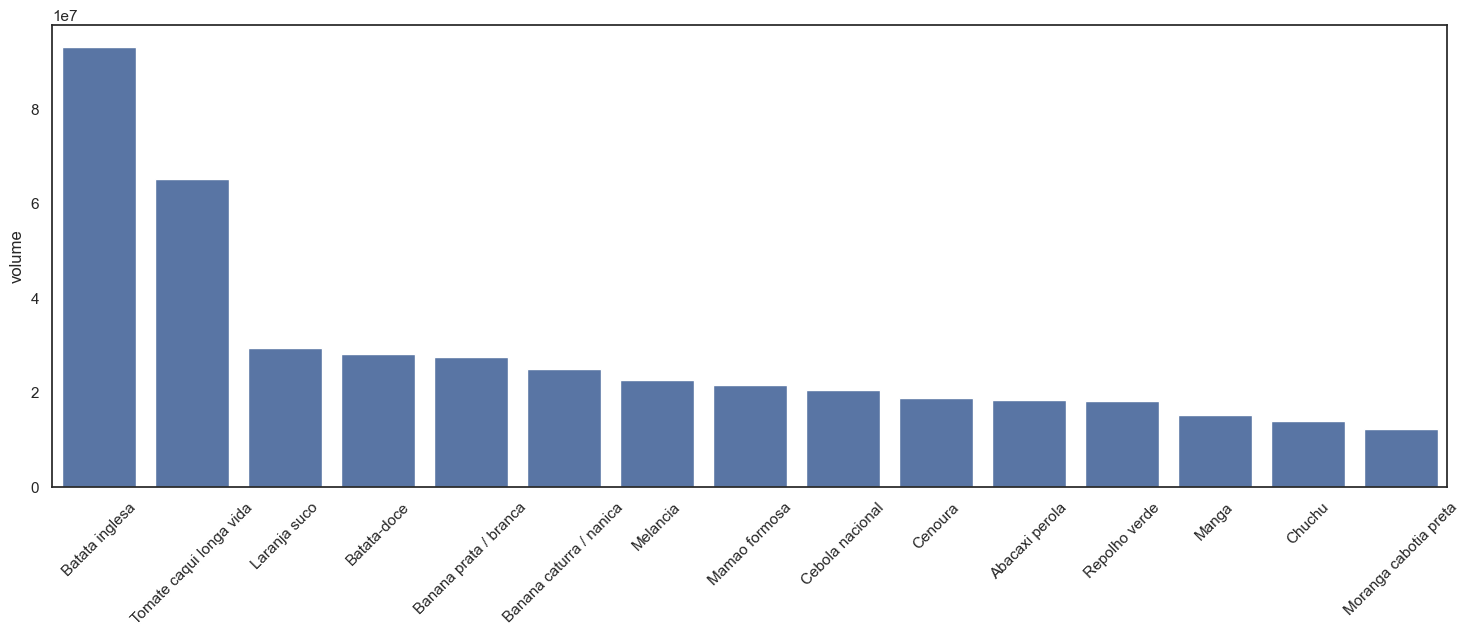

In [39]:
nomes_produtos = [item[6:].capitalize() for item in dados_2023['produto']]
sns.set_theme(style='white')
fig,ax = plt.subplots(figsize=(18,6))

ax = sns.barplot(data=dados_2023, x=nomes_produtos, y='volume')

ax.xaxis.set_tick_params(labelrotation=45)


plt.show()